In [1]:
# Load all predicted activity for the 7 tasks.

import numpy as np

LKPredAllTaskPos=np.load('LKPredAllTasksPos.npy')
LKPredAllTaskNeg=np.load('LKPredAllTasksNeg.npy')

#TPProjPos=(LKPredAllTaskPos>0).mean(axis=1)



In [2]:
# Load the real data for the 7 tasks.
import nibabel as nb
import numpy as np
 
# cifti code based on Christopher J Markiewicz https://nbviewer.jupyter.org/github/neurohackademy/nh2020-curriculum/blob/master/we-nibabel-markiewicz/NiBabel.ipynb
# load cifti file containing the vertexwise values, in this case myelin map from the HCP
cifti = nb.load('/Users/robleech/Dropbox/HCP_S900_GroupAvg_v1/HCP_S900_787_tfMRI_ALLTASKS_level3_zstat1_hp200_s2_MSMSulc.dscalar.nii')
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header

axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]

def surf_data_from_cifti(data, axis, surf_name): 
    assert isinstance(axis, nb.cifti2.BrainModelAxis)
    for name, data_indices, model in axis.iter_structures():  # Iterates over volumetric and surface structures
        if name == surf_name:                                 # Just looking for a surface
            data = data.T[data_indices]                       # Assume brainmodels axis is last, move it to front
            vtx_indices = model.vertex                        # Generally 1-N, except medial wall vertices
            surf_data = np.zeros((vtx_indices.max() + 1,) + data.shape[1:], dtype=data.dtype)
            surf_data[vtx_indices] = data
            return surf_data
    raise ValueError(f"No structure named {surf_name}")

left_brain=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT')

#load gifti surface that is the same resolution/underlying mesh etc as the cifti
gifti_img_BaseBrain = nb.load('/Users/robleech/Dropbox/BrainSmash/S900.L.sphere.32k_fs_LR.surf.gii')

#u_vals,u_index=np.unique(left_brain[:,0],return_inverse=True)

xyz_points=gifti_img_BaseBrain.darrays[0].data


cifti = nb.load('/Users/robleech/Dropbox/HCP_S900_GroupAvg_v1/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii')
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header
axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
#left_brainSulc=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT')


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
import scipy

cifti = nb.load('HCP_S900_787_tfMRI_ALLTASKS_level3_zstat1_hp200_s2_MSMSulc.dscalar.nii')
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header

axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
left_brain=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT')

taskNames=np.loadtxt('TaskNames.txt',dtype=str,delimiter=',')
tasks=np.asarray([9,31,42,62,69,74,80])

LKPredAllTasks=np.zeros(LKPredAllTaskPos.shape)
AllThresh=np.zeros([7])

count=0
for i in range(tasks.shape[0]):

    task=tasks[i]

    LKPredAllTasks[left_brain[:,task]>0,i]=LKPredAllTaskPos[left_brain[:,task]>0,i]*-1
    LKPredAllTasks[left_brain[:,task]<0,i]=LKPredAllTaskNeg[left_brain[:,task]<0,i]



pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [4]:
from scipy import stats
ProjPos=(LKPredAllTasks>0).mean(axis=1)
ProjNeg=(LKPredAllTasks<0).mean(axis=1)


TPRealPos=(left_brain[:,tasks]>0).mean(axis=1)
TPRealNeg=(left_brain[:,tasks]<0).mean(axis=1)

stats.spearmanr(TPRealPos,ProjPos)



SignificanceResult(statistic=0.6372795543596766, pvalue=0.0)

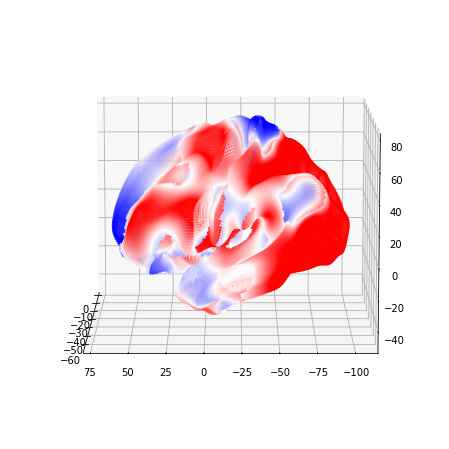

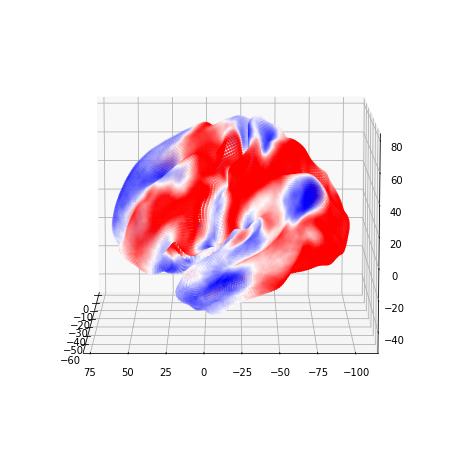

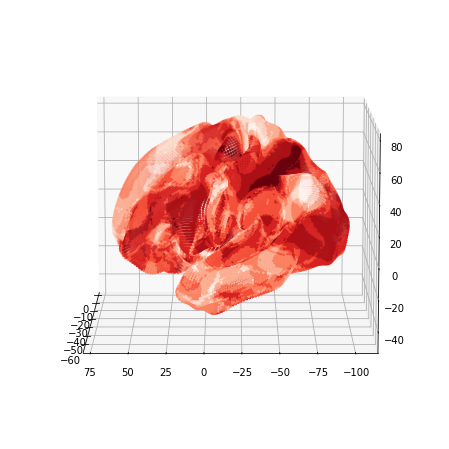

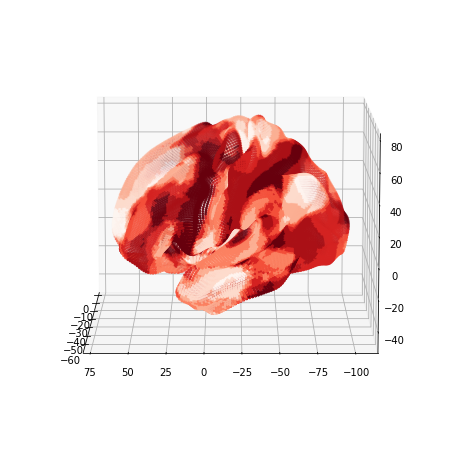

In [5]:
import matplotlib.pyplot as plt

gifti_img_Midthickness = nb.load('/Users/robleech/Dropbox/HCP_S900_GroupAvg_v1/S900.L.midthickness_MSMAll.32k_fs_LR.surf.gii')
xyz_points_Mid=gifti_img_Midthickness.darrays[0].data
azim=0

taskID=5
TProj=LKPredAllTasks[:,taskID]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#p=ax.scatter(xyz_points[:,0],xyz_points[:,1],xyz_points[:,2],c=LKpred_all,s=3,cmap='bwr',vmin=-10,vmax=10)
p=ax.scatter(xyz_points_Mid[np.abs(left_brain[:,0])>0,0],xyz_points_Mid[np.abs(left_brain[:,0])>0,1],xyz_points_Mid[np.abs(left_brain[:,0])>0,2],c=TProj[np.abs(left_brain[:,0])>0],s=3,cmap='bwr',vmin=-20,vmax=20)
azim=180
ax.view_init(elev=10., azim=azim)

#fig.colorbar(p,ax=ax)
task=tasks[taskID]
TProj=left_brain[:,task]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#p=ax.scatter(xyz_points[:,0],xyz_points[:,1],xyz_points[:,2],c=LKpred_all,s=3,cmap='bwr',vmin=-10,vmax=10)
p=ax.scatter(xyz_points_Mid[np.abs(left_brain[:,0])>0,0],xyz_points_Mid[np.abs(left_brain[:,0])>0,1],xyz_points_Mid[np.abs(left_brain[:,0])>0,2],c=TProj[np.abs(left_brain[:,0])>0],s=3,cmap='bwr',vmin=-20,vmax=20)
azim=180
ax.view_init(elev=10., azim=azim)


#fig.colorbar(p,ax=ax)
task=tasks[taskID]
TProj=ProjPos

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#p=ax.scatter(xyz_points[:,0],xyz_points[:,1],xyz_points[:,2],c=LKpred_all,s=3,cmap='bwr',vmin=-10,vmax=10)
p=ax.scatter(xyz_points_Mid[np.abs(left_brain[:,0])>0,0],xyz_points_Mid[np.abs(left_brain[:,0])>0,1],xyz_points_Mid[np.abs(left_brain[:,0])>0,2],c=TProj[np.abs(left_brain[:,0])>0],s=3,cmap='Reds',vmin=0,vmax=1)
azim=180
ax.view_init(elev=10., azim=azim)

task=tasks[taskID]
TProj=TPRealPos

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#p=ax.scatter(xyz_points[:,0],xyz_points[:,1],xyz_points[:,2],c=LKpred_all,s=3,cmap='bwr',vmin=-10,vmax=10)
p=ax.scatter(xyz_points_Mid[np.abs(left_brain[:,0])>0,0],xyz_points_Mid[np.abs(left_brain[:,0])>0,1],xyz_points_Mid[np.abs(left_brain[:,0])>0,2],c=TProj[np.abs(left_brain[:,0])>0],s=3,cmap='Reds',vmin=0,vmax=1)
azim=180
ax.view_init(elev=10., azim=azim)


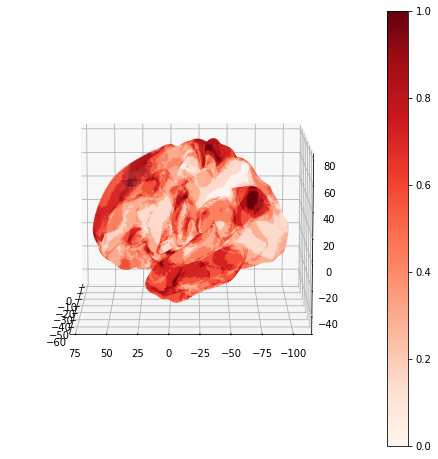

In [6]:
import matplotlib.pyplot as plt

gifti_img_Midthickness = nb.load('/Users/robleech/Dropbox/HCP_S900_GroupAvg_v1/S900.L.midthickness_MSMAll.32k_fs_LR.surf.gii')
xyz_points_Mid=gifti_img_Midthickness.darrays[0].data
azim=0

TProj=(LKPredAllTasks<0).mean(axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#p=ax.scatter(xyz_points[:,0],xyz_points[:,1],xyz_points[:,2],c=LKpred_all,s=3,cmap='bwr',vmin=-10,vmax=10)
p=ax.scatter(xyz_points_Mid[np.abs(left_brain[:,0])>0,0],xyz_points_Mid[np.abs(left_brain[:,0])>0,1],xyz_points_Mid[np.abs(left_brain[:,0])>0,2],c=TProj[np.abs(left_brain[:,0])>0],s=3,cmap='Reds',vmin=0,vmax=1)
azim=180
ax.view_init(elev=10., azim=azim)

fig.colorbar(p,ax=ax)

In [70]:

import numpy as np

YeoNetworks=np.zeros([left_brain.shape[0],7])
for i in range(7):
    cifti = nb.load('/Users/robleech/Dropbox/HCP_S900_GroupAvg_v1/7Networks' + str(i+1) + '.dscalar.nii')
    cifti_data = cifti.get_fdata(dtype=np.float32)
    cifti_hdr = cifti.header
    nifti_hdr = cifti.nifti_header
    axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
    left_brainYeo=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT')
    #left_brainYeoDMN=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_RIGHT')
    YeoNetworks[:,i]=left_brainYeo[:,0]

realProjYeo = np.zeros([7,7])

for i in range(7):
    taskToKeep=np.delete(np.arange(7),i)
    

    ProjPos=(LKPredAllTasks[:,taskToKeep]>0).mean(axis=1)
    

    tasksDel=np.delete(tasks,i)
    TPRealPos=(left_brain[:,tasksDel]>0).mean(axis=1)

    for yn in range(7):
        #realProjYeo[yn]=stats.pearsonr(TPRealPos[YeoNetworks[:,yn]==1],ProjPos[YeoNetworks[:,yn]==1])[0]
        #realProjYeo[yn]=np.sqrt(np.power(TPRealPos[YeoNetworks[:,yn]==1]-ProjPos[YeoNetworks[:,yn]==1],2).mean())
        realProjYeo[i,yn]=(np.abs(TPRealPos[YeoNetworks[:,yn]==1]-ProjPos[YeoNetworks[:,yn]==1]).mean())




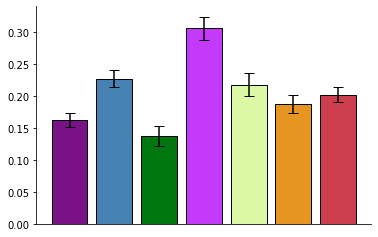

In [74]:
#

import matplotlib.pyplot as plt
import numpy as np

network_colors = {
    1: [120/255,18/255,134/255],  #
    2: [70/255,130/255,180/255],  #
    3: [0,118/255,14/255],  # 
    4: [196/255,58/255,250/255],  # 
    5: [220/255,248/255,164/255],  # 
    6: [230/255,148/255,34/255],  # 
    7: [205/255,62/255,78/255]   # 
}

# Calculate mean and standard error
means = realProjYeo.mean(axis=0)
std_errors = realProjYeo.std(axis=0)# / np.sqrt(realProjYeo.shape[0])  # Assuming you have the number of samples in realProjYeo.shape[0]

# Plot the bars with Yeo et al. (2011) colors and error bars
plt.bar(np.arange(7), means, color=[network_colors[i+1] for i in range(7)], edgecolor='black', yerr=std_errors, capsize=5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([])
plt.savefig('DifferentYeo.png', dpi=600)
plt.show()


In [186]:
# 

def write_plyRGB(filename, vertices, faces, colorsR,colorsG,colorsB,comment=None):
    import pandas as pd
    print("writing ply format")
    # infer number of vertices and faces
    number_vertices = vertices.shape[0]
    number_faces = faces.shape[0]
    # make header dataframe
    header = ['ply',
            'format ascii 1.0',
            'comment %s' % comment,
            'element vertex %i' % number_vertices,
            'property float x',
            'property float y',
            'property float z',
            'property uchar red',
            'property uchar green',
            'property uchar blue',
            'element face %i' % number_faces,
            'property list uchar int vertex_indices',
            'end_header'
             ]
    header_df = pd.DataFrame(header)
    # make dataframe from vertices
    vertex_df = pd.DataFrame(vertices/50)
    #colors_df = pd.DataFrame(np.tile(np.round(colors/7*255), (3,1)).T)
    ColorsR_df=pd.DataFrame(colorsR)
    ColorsG_df=pd.DataFrame(colorsG)
    ColorsB_df=pd.DataFrame(colorsB)
    colorsConcat = pd.concat([ColorsR_df,ColorsG_df,ColorsB_df], axis=1)
    colors_df=pd.DataFrame(colorsConcat)
    colors_df=colorsConcat.astype(int)
    df_concat = pd.concat([vertex_df, colors_df], axis=1)
    # make dataframe from faces, adding first row of 3s (indicating triangles)
    triangles = np.reshape(3 * (np.ones(number_faces)), (number_faces, 1))
    triangles = triangles.astype(int)
    faces = faces.astype(int)
    faces_df = pd.DataFrame(np.concatenate((triangles, faces), axis=1))
    # write dfs to csv
    header_df.to_csv(filename, header=None, index=False)
    with open(filename, 'a') as f:
        df_concat.to_csv(f, header=False, index=False,
                         float_format='%.3f', sep=' ')
    with open(filename, 'a') as f:
        faces_df.to_csv(f, header=False, index=False,
                        float_format='%.0f', sep=' ')

In [187]:
#realProjYeo

import  matplotlib.cm
cmap = matplotlib.cm.get_cmap('Reds')

TPRealPos[left_brain[:,0]==0]==0
ProjPos[left_brain[:,0]==0]==0

vertices=gifti_img_Midthickness.darrays[0].data
faces=gifti_img_Midthickness.darrays[1].data
colors=ProjPos#/7#*254+1
CMap=cmap(colors)*255
print(CMap)

write_plyRGB('TPProj.ply',vertices,faces,CMap[:,0],CMap[:,1],CMap[:,2])

vertices=gifti_img_Midthickness.darrays[0].data
faces=gifti_img_Midthickness.darrays[1].data
colors=TPRealPos#/7#*254+1
CMap=cmap(colors)*255


write_plyRGB('TPReal.ply',vertices,faces,CMap[:,0],CMap[:,1],CMap[:,2])



[[255.         245.         240.         255.        ]
 [253.74117647 219.21176471 203.65882353 255.        ]
 [252.         175.10196078 147.36078431 255.        ]
 ...
 [252.         175.10196078 147.36078431 255.        ]
 [252.         175.10196078 147.36078431 255.        ]
 [252.         175.10196078 147.36078431 255.        ]]
writing ply format
writing ply format
